In [1]:
import tensorflow as tf
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


# Dacon : Predicting Real transaction price of apartments
## EDA
1.  Checking Varaible Type
2. Pie plot Categorical Variable
3. Correlation Plot Quantitive Variable
4. PCA plot or Tsne plot
5.  PCA Clustering

In [2]:
root = r'D:\data\dacon\zigbang\raw_data'
train_fname ='train.csv'
test_fname = 'test.csv'

In [3]:
df_train = pd.read_csv(os.path.join(root,train_fname))

In [5]:
## total_parking_capacity_in_site, tallest_building_in_sites ,lowest_building_in_sites ,room_count, bathroom_cont 모두 
## integer로 바꿔야
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601458 entries, 0 to 1601457
Data columns (total 25 columns):
key                                   1601458 non-null int64
apartment_id                          1601458 non-null int64
city                                  1601458 non-null int64
transaction_year_month                1601458 non-null int64
transaction_date                      1601458 non-null object
year_of_completion                    1601458 non-null int64
exclusive_use_area                    1601458 non-null float64
floor                                 1601458 non-null int64
latitude                              1601458 non-null float64
longitude                             1601458 non-null float64
address_by_law                        1601458 non-null int64
total_parking_capacity_in_site        1509645 non-null float64
total_household_count_in_sites        1601458 non-null int64
apartment_building_count_in_sites     1601458 non-null int64
tallest_building_in_site

In [6]:
print(df_train.head())

   key  apartment_id  city  transaction_year_month transaction_date  \
0    0          5584     1                  200601            11~20   
1    1          5584     1                  200601            11~20   
2    2          5059     1                  200601            11~20   
3    3          2816     1                  200601            11~20   
4    4          2816     1                  200601            11~20   

   year_of_completion  exclusive_use_area  floor   latitude   longitude  \
0                1999               47.43      6  37.585965  127.000231   
1                1999               44.37      8  37.585965  127.000231   
2                1992               54.70      8  37.580511  127.014016   
3                1993               64.66     11  37.580324  127.011788   
4                1993              106.62      7  37.580324  127.011788   

            ...            lowest_building_in_sites   heat_type  heat_fuel  \
0           ...                             

### Categorical Variable Analysis + pieplot

In [7]:
## Transaction_year_month

df_train.transaction_year_month.unique()

array([200601, 200602, 200603, 200604, 200605, 200606, 200607, 200608,
       200609, 200610, 200611, 200612, 200701, 200702, 200703, 200704,
       200705, 200706, 200707, 200708, 200709, 200710, 200711, 200712,
       200801, 200802, 200803, 200804, 200805, 200806, 200807, 200808,
       200809, 200810, 200811, 200812, 200901, 200902, 200903, 200904,
       200905, 200906, 200907, 200908, 200909, 200910, 200911, 200912,
       201001, 201002, 201003, 201004, 201005, 201006, 201007, 201008,
       201009, 201010, 201011, 201012, 201101, 201102, 201103, 201104,
       201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112,
       201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208,
       201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304,
       201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312,
       201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408,
       201409, 201410, 201411, 201412, 201501, 201502, 201503, 201504,
      

In [8]:
df_train.transaction_year_month

0          200601
1          200601
2          200601
3          200601
4          200601
5          200601
6          200601
7          200601
8          200601
9          200601
10         200601
11         200601
12         200601
13         200601
14         200601
15         200601
16         200601
17         200601
18         200601
19         200601
20         200601
21         200601
22         200601
23         200601
24         200601
25         200601
26         200601
27         200601
28         200601
29         200601
            ...  
1601428    201810
1601429    201810
1601430    201810
1601431    201810
1601432    201810
1601433    201810
1601434    201810
1601435    201810
1601436    201810
1601437    201810
1601438    201810
1601439    201810
1601440    201810
1601441    201810
1601442    201810
1601443    201810
1601444    201810
1601445    201810
1601446    201810
1601447    201810
1601448    201810
1601449    201810
1601450    201810
1601451    201810
1601452   

In [9]:
pd.to_datetime(df_train.transaction_year_month, format='%Y%m')

0         2006-01-01
1         2006-01-01
2         2006-01-01
3         2006-01-01
4         2006-01-01
5         2006-01-01
6         2006-01-01
7         2006-01-01
8         2006-01-01
9         2006-01-01
10        2006-01-01
11        2006-01-01
12        2006-01-01
13        2006-01-01
14        2006-01-01
15        2006-01-01
16        2006-01-01
17        2006-01-01
18        2006-01-01
19        2006-01-01
20        2006-01-01
21        2006-01-01
22        2006-01-01
23        2006-01-01
24        2006-01-01
25        2006-01-01
26        2006-01-01
27        2006-01-01
28        2006-01-01
29        2006-01-01
             ...    
1601428   2018-10-01
1601429   2018-10-01
1601430   2018-10-01
1601431   2018-10-01
1601432   2018-10-01
1601433   2018-10-01
1601434   2018-10-01
1601435   2018-10-01
1601436   2018-10-01
1601437   2018-10-01
1601438   2018-10-01
1601439   2018-10-01
1601440   2018-10-01
1601441   2018-10-01
1601442   2018-10-01
1601443   2018-10-01
1601444   201

In [4]:
df_train.transaction_year_month = pd.to_datetime(df_train.transaction_year_month, format='%Y%m')

In [5]:
df_train['transaction_year'] = df_train.transaction_year_month.apply(lambda t : t.year)
df_train['transaction_month'] = df_train.transaction_year_month.apply(lambda t : t.month)

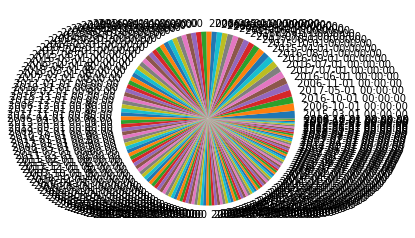

In [11]:
pd.value_counts(df_train['transaction_year_month']).plot.pie()

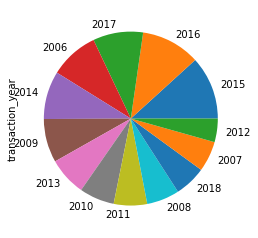

In [35]:
pd.value_counts(df_train['transaction_year']).plot.pie()

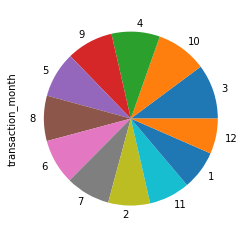

In [36]:
pd.value_counts(df_train['transaction_month']).plot.pie()

In [41]:
## Transaction_date
df_train.transaction_date.unique()

array(['11~20', '1~10', '21~31', '21~28', '21~30', '21~29'], dtype=object)

In [6]:
## 1 ~10 -> 1
## 11~20 -> 2
## 21 ~ 28 29 30 -> 3
encoding_dict = {}
encoding_dict['11~20']= 2
encoding_dict['1~10'] = 1
encoding_dict['21~28'] = 3
encoding_dict['21~29'] = 3
encoding_dict['21~30'] = 3
encoding_dict['21~31'] = 3

In [7]:
df_train.transaction_date = df_train.transaction_date.apply(lambda x : encoding_dict[x])

In [14]:
df_train.transaction_date.unique()

array([2, 1, 3], dtype=int64)

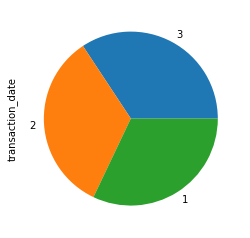

In [47]:
pd.value_counts(df_train['transaction_date']).plot.pie()

In [52]:
## year_of_completion
## 아파트가 얼마나 노후됐는 지 알 수 있음
df_train.year_of_completion

0          1999
1          1999
2          1992
3          1993
4          1993
5          2000
6          2000
7          2005
8          1999
9          2002
10         1999
11         1999
12         2005
13         2005
14         1999
15         1999
16         2005
17         2002
18         1999
19         2005
20         2005
21         2002
22         2001
23         1997
24         1997
25         1997
26         1997
27         1997
28         1997
29         1997
           ... 
1601428    1999
1601429    2004
1601430    2009
1601431    1996
1601432    1996
1601433    2008
1601434    1976
1601435    2011
1601436    2013
1601437    2013
1601438    2014
1601439    2014
1601440    2014
1601441    2014
1601442    1990
1601443    2011
1601444    2004
1601445    1995
1601446    2004
1601447    2011
1601448    2014
1601449    2014
1601450    2015
1601451    1991
1601452    2007
1601453    1999
1601454    2007
1601455    2014
1601456    1996
1601457    1999
Name: year_of_completion

In [8]:
df_train['age'] = df_train.year_of_completion.apply(lambda x : 2019 - x)

In [54]:
df_train['age'] 

0          20
1          20
2          27
3          26
4          26
5          19
6          19
7          14
8          20
9          17
10         20
11         20
12         14
13         14
14         20
15         20
16         14
17         17
18         20
19         14
20         14
21         17
22         18
23         22
24         22
25         22
26         22
27         22
28         22
29         22
           ..
1601428    20
1601429    15
1601430    10
1601431    23
1601432    23
1601433    11
1601434    43
1601435     8
1601436     6
1601437     6
1601438     5
1601439     5
1601440     5
1601441     5
1601442    29
1601443     8
1601444    15
1601445    24
1601446    15
1601447     8
1601448     5
1601449     5
1601450     4
1601451    28
1601452    12
1601453    20
1601454    12
1601455     5
1601456    23
1601457    20
Name: age, Length: 1601458, dtype: int64

In [63]:
## 세데 수
df_train.apartment_building_count_in_sites

0           8.0
1           8.0
2          14.0
3          15.0
4          15.0
5          23.0
6          23.0
7          23.0
8          20.0
9          18.0
10         23.0
11         23.0
12         23.0
13         23.0
14         20.0
15         23.0
16         23.0
17         18.0
18         20.0
19         23.0
20         23.0
21         18.0
22         18.0
23         30.0
24         30.0
25         30.0
26         30.0
27         30.0
28         30.0
29         30.0
           ... 
1601428    27.0
1601429    20.0
1601430    15.0
1601431    12.0
1601432    12.0
1601433    20.0
1601434     5.0
1601435    20.0
1601436    15.0
1601437    15.0
1601438    11.0
1601439    11.0
1601440    11.0
1601441    11.0
1601442    15.0
1601443    33.0
1601444    20.0
1601445    26.0
1601446    29.0
1601447    20.0
1601448    35.0
1601449    35.0
1601450    29.0
1601451    15.0
1601452    15.0
1601453    27.0
1601454    15.0
1601455    35.0
1601456    19.0
1601457    22.0
Name: tallest_building_i

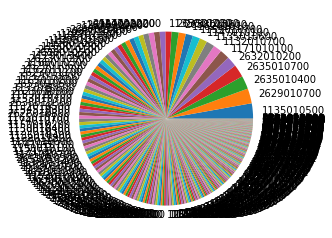

In [66]:
pd.value_counts(df_train['address_by_law']).plot.pie()

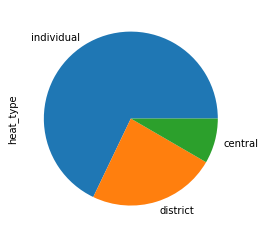

In [67]:
pd.value_counts(df_train['heat_type']).plot.pie()

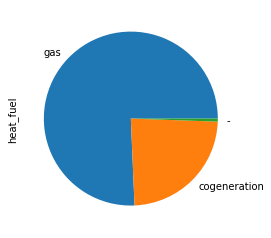

In [69]:
pd.value_counts(df_train['heat_fuel']).plot.pie()

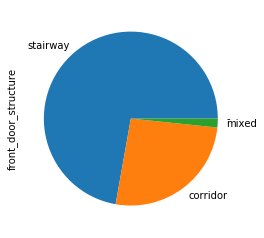

In [71]:
pd.value_counts(df_train['front_door_structure']).plot.pie()

### Quantative Variable

In [9]:
quant_col = ['exclusive_use_area','total_parking_capacity_in_site','total_household_count_in_sites','apartment_building_count_in_sites',
           'tallest_building_in_sites', 'lowest_building_in_sites', 'supply_area', 'room_count','bathroom_count','age',
           'transaction_real_price']

In [10]:
df_quant = df_train[quant_col]

In [20]:
df_quant.head()

,exclusive_use_area,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,supply_area,room_count,bathroom_count,age,transaction_real_price
0,47.43,163.0,136,1,8.0,4.0,65.63,1.0,1.0,20,215000000
1,44.37,163.0,136,1,8.0,4.0,61.39,2.0,1.0,20,200000000
2,54.70,902.0,585,5,14.0,9.0,72.36,2.0,1.0,27,168000000
3,64.66,902.0,919,7,15.0,11.0,87.30,2.0,1.0,26,165000000
4,106.62,902.0,919,7,15.0,11.0,127.74,4.0,2.0,26,280000000


In [21]:
df_quant.corr()

,exclusive_use_area,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,supply_area,room_count,bathroom_count,age,transaction_real_price
exclusive_use_area,1.000000,0.142754,-0.019513,0.019302,0.292330,0.215967,0.982868,0.768730,0.647699,-0.240114,0.518922
total_parking_capacity_in_site,0.142754,1.000000,0.902220,0.776327,0.416663,0.228722,0.175613,0.107747,0.147183,-0.183910,0.310130
total_household_count_in_sites,-0.019513,0.902220,1.000000,0.868769,0.244966,0.095121,0.002581,-0.003850,-0.014235,-0.020142,0.216658
apartment_building_count_in_sites,0.019302,0.776327,0.868769,1.000000,0.074067,-0.071532,0.019020,0.043279,0.041136,-0.041624,0.290689
tallest_building_in_sites,0.292330,0.416663,0.244966,0.074067,1.000000,0.718130,0.381273,0.196644,0.316246,-0.509592,0.193310
lowest_building_in_sites,0.215967,0.228722,0.095121,-0.071532,0.718130,1.000000,0.272242,0.105895,0.191834,-0.284672,0.113520
supply_area,0.982868,0.175613,0.002581,0.019020,0.381273,0.272242,1.000000,0.758132,0.654122,-0.319938,0.521845
room_count,0.768730,0.107747,-0.003850,0.043279,0.196644,0.105895,0.758132,1.000000,0.565053,-0.229913,0.383066
bathroom_count,0.647699,0.147183,-0.014235,0.041136,0.316246,0.191834,0.654122,0.565053,1.000000,-0.521243,0.331598
age,-0.240114,-0.183910,-0.020142,-0.041624,-0.509592,-0.284672,-0.319938,-0.229913,-0.521243,1.000000,-0.132442


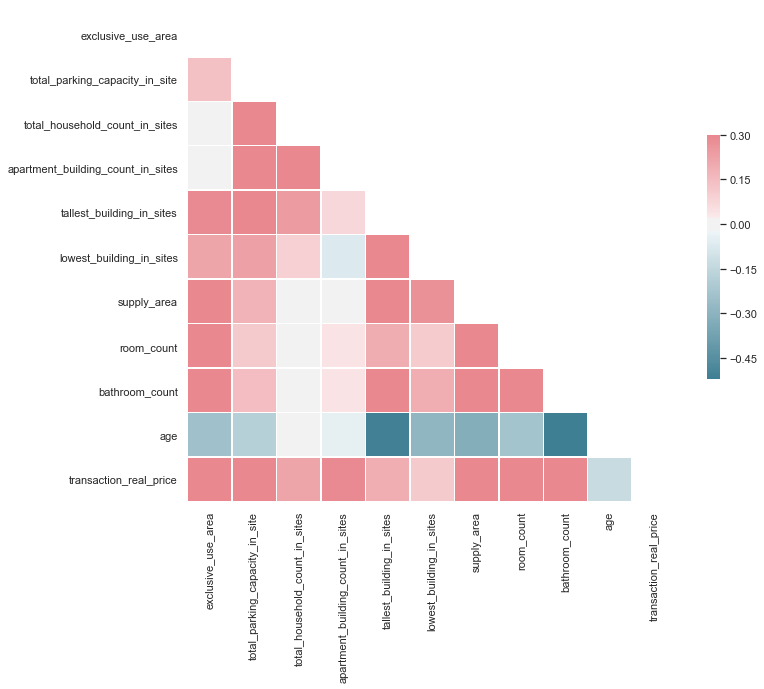

In [25]:
sns.set(style="white")


# Compute the correlation matrix
corr = df_quant.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

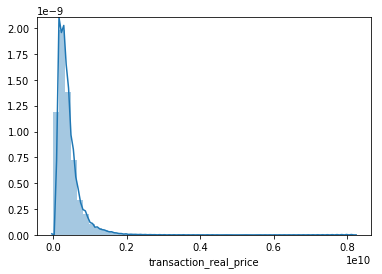

In [17]:
sns.distplot(df_train.transaction_real_price)

In [28]:
df_train.transaction_real_price.describe()

count    1.601458e+06
mean     4.021752e+08
std      3.223861e+08
min      7.000000e+06
25%      1.990000e+08
50%      3.240000e+08
75%      5.000000e+08
max      8.200000e+09
Name: transaction_real_price, dtype: float64

### Geometric Variable
* https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration reference

In [11]:
### Min Max of latitude and longitude

print("Range of Latitude : ", min(df_train.latitude) ,' ~ ' , max(df_train.latitude))
print("Range of Longitude", min(df_train.longitude) ,' ~ ' , max(df_train.longitude))


Range of Latitude :  35.04878639164053  ~  37.68763299875252
Range of Longitude 126.80610153120372  ~  129.237592


In [12]:
BoundingBox = (min(df_train.longitude),max(df_train.longitude),min(df_train.latitude), max(df_train.latitude))

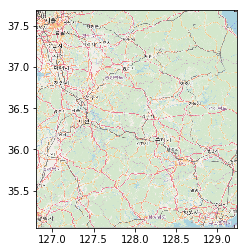

In [13]:
map_path = 'C:/Users/82103/Desktop/datascience/dacon/zigbang/korea_map.PNG'
kor_map = plt.imread(map_path)
plt.imshow(kor_map,extent=BoundingBox)

In [14]:
BoundingBox = (min(df_train.longitude),max(df_train.longitude),min(df_train.latitude), max(df_train.latitude))

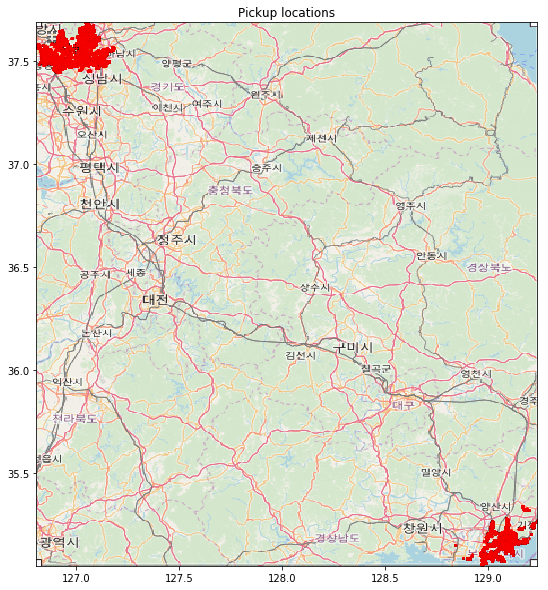

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(16,10))
axs.scatter(df_train.longitude, df_train.latitude, zorder=1,alpha=0.1, c='r', s=0.5)
axs.set_xlim((BoundingBox[0], BoundingBox[1]))
axs.set_ylim((BoundingBox[2], BoundingBox[3]))
axs.set_title('Pickup locations')
axs.imshow(kor_map, zorder=0,extent=BoundingBox)

In [16]:
seoul_data = df_train[df_train.city == 1]
busan_data = df_train[df_train.city == 0]


In [17]:
print("Range of Seoul Latitude : ", min(seoul_data.latitude) ,' ~ ' , max(seoul_data.latitude))
print("Range of Seoul Longitude", min(seoul_data.longitude) ,' ~ ' , max(seoul_data.longitude))

print("Range of Busan Latitude : ", min(busan_data.latitude) ,' ~ ' , max(busan_data.latitude))
print("Range of Busan Longitude", min(busan_data.longitude) ,' ~ ' , max(busan_data.longitude))


Range of Seoul Latitude :  37.4464015  ~  37.68763299875252
Range of Seoul Longitude 126.80610153120372  ~  127.180794
Range of Busan Latitude :  35.04878639164053  ~  35.33871262916821
Range of Busan Longitude 128.838169  ~  129.237592


In [18]:
bb_seoul =  (min(seoul_data.longitude),max(seoul_data.longitude),min(seoul_data.latitude), max(seoul_data.latitude))
bb_busan =  (min(busan_data.longitude)-0.01,max(busan_data.longitude)-0.01,min(busan_data.latitude)-0.03, max(busan_data.latitude))

In [19]:
seoul_map = plt.imread(map_path.replace('korea_map','seoul_map'))
busan_map = plt.imread(map_path.replace('korea_map','busan_map'))

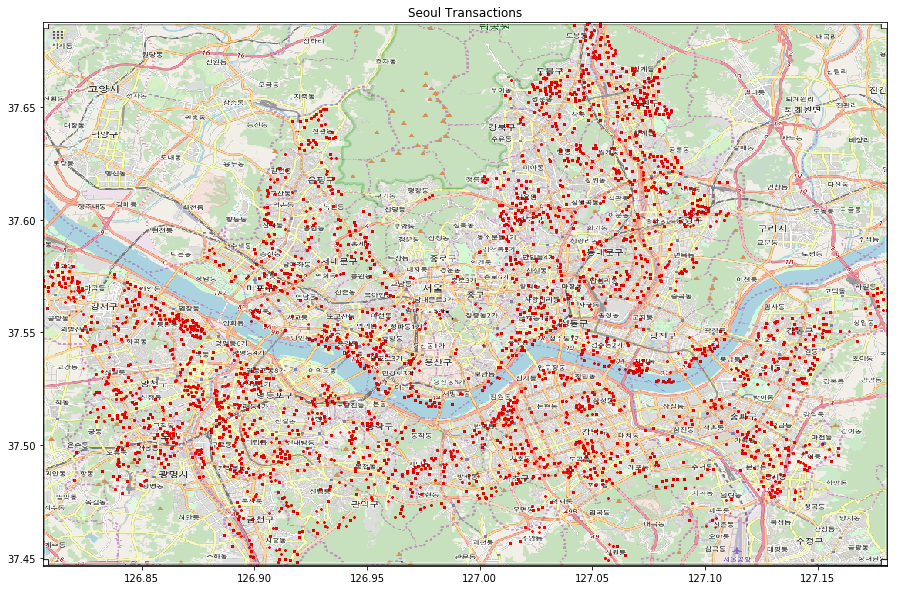

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(16,10))
axs.scatter(seoul_data.longitude, seoul_data.latitude, zorder=1,alpha=0.1, c='r', s=0.5)
axs.set_xlim((bb_seoul[0], bb_seoul[1]))
axs.set_ylim((bb_seoul[2], bb_seoul[3]))
axs.set_title('Seoul Transactions')
axs.imshow(seoul_map, zorder=0,extent=bb_seoul)

# axs[1].scatter(busan_data.longitude, busan_data.latitude, zorder=1,alpha=0.1, c='r', s=0.5)
# axs[1].set_xlim((bb_busan[0], bb_busan[1]))
# axs[1].set_ylim((bb_busan[2], bb_busan[3]))
# axs[1].set_title('Pickup locations')
# axs[1].imshow(busan_map, zorder=0,extent=bb_busan)

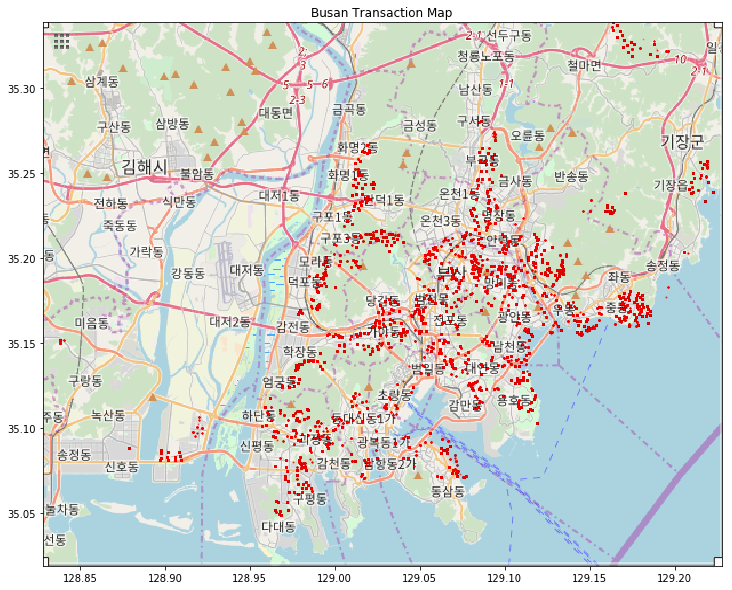

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(16,10))

axs.scatter(busan_data.longitude, busan_data.latitude, zorder=1,alpha=0.1, c='r', s=0.5)
axs.set_xlim((bb_busan[0], bb_busan[1]))
axs.set_ylim((bb_busan[2], bb_busan[3]))
axs.set_title('Busan Transaction Map')
axs.imshow(busan_map, zorder=0,extent=bb_busan)

### Categorizing Target Variable

In [ ]:
df_train.transaction_real_price.describe()

count    1.601458e+06
mean     4.021752e+08
std      3.223861e+08
min      7.000000e+06
25%      1.990000e+08
50%      3.240000e+08
75%      5.000000e+08
max      8.200000e+09
Name: transaction_real_price, dtype: float64

In [20]:
per25 = df_train.transaction_real_price.describe()[4]
per50 = df_train.transaction_real_price.describe()[1]
per75 = df_train.transaction_real_price.describe()[6]


def divide_target(record):
    
    if record < per25 :
        record = 1
        return record
    elif record >= per25 and record < per50 :
        record = 2
        return record
    elif record >= per50 and record <  per75:
        record = 3
        return record
    else :
        record = 4
        return record
    
    


In [21]:
df_train['price_categorized'] = df_train.transaction_real_price.apply(lambda x : divide_target(x))

In [22]:
df_train[['price_categorized','transaction_real_price']]

,price_categorized,transaction_real_price
0,2,215000000
1,2,200000000
2,1,168000000
3,1,165000000
4,2,280000000
5,3,415000000
6,2,267000000
7,3,415000000
8,2,310000000
9,2,319000000


In [23]:
seoul_data = df_train[df_train.city == 1]
busan_data = df_train[df_train.city == 0]


In [ ]:
## Need Debug

color_dict = {1 : 'red', 2 : 'orange', 3 : 'yellow', 4 : 'green'  }

fig, axs = plt.subplots(1, 1, figsize=(30,20))
axs.set_xlim((bb_seoul[0], bb_seoul[1]))
axs.set_ylim((bb_seoul[2], bb_seoul[3]))
axs.imshow(seoul_map, zorder=0,extent=bb_seoul)
axs.set_title('Seoul Transactions')

for i in range(len(seoul_data)):
    if i % 100 == 0 : print(i)
    axs.scatter(seoul_data.longitude.iloc[i],seoul_data.latitude.iloc[i], alpha=0.70, color = color_dict[seoul_data.price_categorized.iloc[i]],
                label=seoul_data.price_categorized.iloc[i])
    

# axs.scatter(seoul_data.longitude, seoul_data.latitude, zorder=1,alpha=0.1,cmap='viridis',
#             color=seoul_data.price_categorized.apply(lambda x : color_dict[x]), s=0.5)


# axs[1].scatter(busan_data.longitude, busan_data.latitude, zorder=1,alpha=0.1, c='r', s=0.5)
# axs[1].set_xlim((bb_busan[0], bb_busan[1]))
# axs[1].set_ylim((bb_busan[2], bb_busan[3]))
# axs[1].set_title('Pickup locations')
# axs[1].imshow(busan_map, zorder=0,extent=bb_busan)

In [ ]:

df_train['attributed_time'] = pd.to_datetime(df_train['attributed_time'])
df_train['click_time'] = pd.to_datetime(df_train['click_time'])

df_train['year'] = df_train.click_time.apply(lambda t: t.year)
df_train['weekday'] = df_train.click_time.apply(lambda t: t.weekday())
df_train['hour'] = df_train.click_time.apply(lambda t: t.hour)

df_test['year'] = df_test.click_time.apply(lambda t: t.year)
df_test['weekday'] = df_test.click_time.apply(lambda t: t.weekday())
df_test['hour'] = df_test.click_time.apply(lambda t: t.hour)

